# PCA

In [1]:
#-*- coding:utf-8 -*-
from pylab import *
import numpy as np

# 创造函数

In [2]:
def pca(data, n_dimension=0, normalise=1):
    # 数据标准化
    mean = np.mean(data, axis=0)
    data -= mean
    # 协方差矩阵
    C = np.cov(transpose(data))
    # 计算特征值特征向量，按降序排序
    evals, evecs = linalg.eig(C)
    indices = np.argsort(evals)#按升序排列,返回的是序列数.
    print(indices)
    indices = indices[::-1]
    evecs = evecs[:, indices]
    evals = evals[indices]
    if n_dimension > 0:
        evecs = evecs[:, :n_dimension]

    if normalise:
        for i in range(shape(evecs)[1]):
            evecs[:, i] / linalg.norm(evecs[:, i]) * sqrt(evals[i])
            # 产生新的数据矩阵
    x = dot(transpose(evecs), transpose(data))
    # 重新计算原数据
    y = transpose(dot(evecs, x)) + mean
    return x, y, evals, evecs

# 原始数据

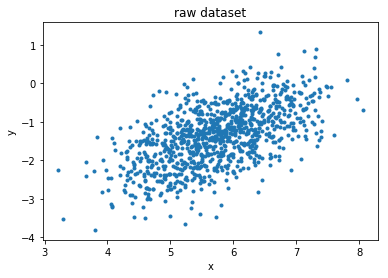

In [3]:
x = np.random.normal(5, .5, 1000)
y = np.random.normal(3, 1, 1000)

a = x * cos(pi / 4) + y * sin(pi / 4)
b = -x * sin(pi / 4) + y * cos(pi / 4)

plot(a, b, '.')

xlabel('x')
ylabel('y')

title('raw dataset')
show()

# 降维后的数据

[1 0]
[[ 6.23822088 -0.87269059]
 [ 5.94432669 -1.15763336]
 [ 6.41315987 -0.70307988]
 ..., 
 [ 5.2827514  -1.79905841]
 [ 5.11107888 -1.96550213]
 [ 4.91431464 -2.15627334]]


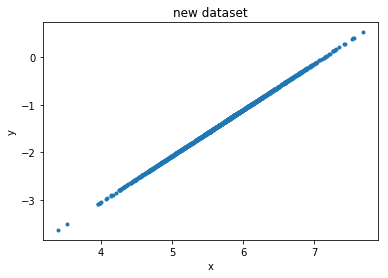

In [4]:
data = zeros((1000, 2))
data[:, 0] = a
data[:, 1] = b
x, y, evals, evecs = pca(data, 1)
print(y)
figure()
plot(y[:, 0], y[:, 1], '.')
xlabel('x')
ylabel('y')
title('new dataset')
show()